#### mini project 2 ####
#### question 1 ####
#### Mina Ilkhani ####
#### 610398191 ####

read *train set*:

In [112]:
import pandas as pd
train = pd.read_csv('./Problem 1/train_set.csv')
train

,x,target
0,2.391265,0.692274
1,4.214828,4.078137
2,2.801953,2.614283
3,2.448590,1.465649
4,4.671812,-1.863850
...,...,...
195,5.254647,-0.334566
196,2.846755,3.444166
197,2.840102,-2.104304
198,1.618443,0.727167


splitting X and target

In [113]:
Xtrain = train.drop(['target'],  axis=1)
Ttrain = train['target']
trainSize = len(Xtrain)
trainSize


200

## Normal Equation in Linear Regression ##

$$ f(x;w) = y_{hat} = w_0+w_1x $$
$$ W = (X^{T}X)^{-1}X^{T}Y $$

*(the dimensions of X not do't matted)*

We add a column of ones as a coefficient of $$ w_0 $$
Also renaming x to x1 makes it more meaningful.

In [114]:
ones = [1 for _ in range(trainSize)]
Xtrain.insert(0, 'x0', ones)
Xtrain
Xtrain = Xtrain.rename(columns = {"x": "x1"})
Xtrain.head()

,x0,x1
0,1,2.391265
1,1,4.214828
2,1,2.801953
3,1,2.448590
4,1,4.671812


read test set:

In [115]:
test = pd.read_csv('./Problem 1/test_set.csv')
test.head()

,x,target
0,1.143986,0.910291
1,5.597518,-0.633189
2,2.213371,0.800556
3,2.269057,0.765961
4,2.974509,0.166308


splite X and target

In [116]:
Xtest = test.drop(['target'],  axis=1)
Ttest = test['target']
testSize = len(Xtest)
testSize


100

insert x0 and rename x to x1

In [117]:
ones = [1 for _ in range(testSize)]
Xtest.insert(0, 'x0', ones)
Xtest = Xtest.rename(columns = {"x": "x1"})
Xtest.head()

,x0,x1
0,1,1.143986
1,1,5.597518
2,1,2.213371
3,1,2.269057
4,1,2.974509


### visualizing the data set and the regression:
There are differences in calculating y for quintic equation and linear equation

In [118]:
import matplotlib.pyplot as plt 
import numpy as np

def visualization(XDiscrete,targetDiscrete,title,flag, XContinuous = None, w= None):

    plt.scatter(XDiscrete['x1'], targetDiscrete)
    
    if flag:
        xMin = XContinuous['x1'].min()
        xMax = XContinuous['x1'].max()
        x = np.arange(xMin,xMax, 0.01)
        y = w[0]+(w[1]*x)
        plt.plot(x, y)     
    
    plt.title(title)
    plt.show()


def visualization5(XDiscrete,targetDiscrete,title, XContinuous = None, w= None):

    plt.scatter(XDiscrete['x1'], targetDiscrete)
    
    xMin = XContinuous['x1'].min()
    xMax = XContinuous['x1'].max()
    x = np.arange(xMin,xMax, 0.01)
    y = w[0]+(w[1]*x)+(w[2]*(x**2))+(w[3]*(x**3))+(w[4]*(x**4))+(w[5]*(x**5))
    plt.plot(x,y )
    
    plt.title(title)

    plt.show()

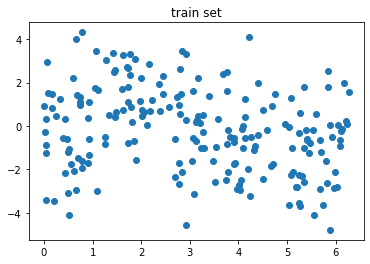

In [119]:
visualization(Xtrain,Ttrain,"train set" , False)

calculating the the best W:

In [120]:
import numpy as np
XtrainNP = Xtrain.to_numpy()
XtrainTranspose = XtrainNP.transpose()
XtrainTranspose.shape

(2, 200)

In [121]:
XtrainTransposeDOTXtrain = np.dot(XtrainTranspose,Xtrain)
XtrainTransposeDOTXtrain

array([[ 200.        ,  621.36443036],
       [ 621.36443036, 2643.00668322]])

In [122]:
from numpy.linalg import inv
XtrainTransposeDOTXtrainInv = inv(XtrainTransposeDOTXtrain)
XtrainTransposeDOTXtrainInv

array([[ 0.01854643, -0.00436022],
       [-0.00436022,  0.00140343]])

In [123]:
XtrainTransposeDOTXtrainInvDOTXtrainTranspose = np.dot(XtrainTransposeDOTXtrainInv,XtrainTranspose)
XtrainTransposeDOTXtrainInvDOTXtrainTranspose.shape

(2, 200)

In [124]:
W = np.dot(XtrainTransposeDOTXtrainInvDOTXtrainTranspose, Ttrain)
W

array([ 0.6421799 , -0.26644821])

Now let's see how it works:

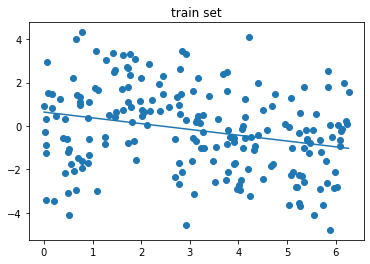

In [125]:
visualization(Xtrain,Ttrain,"train set", True,Xtrain , W)

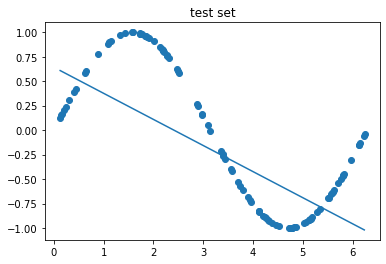

In [126]:
visualization(Xtest,Ttest, 'test set', True,Xtest, W)

$$ MSE = {1/n}\sum(y_i-y_{hati})^2 $$

In [127]:
def MSE(X,Y, w):
    Y_hat = np.dot(X,w)    
    return ((pow(np.subtract(Y,Y_hat),2)) .sum()) / len(X)

In [128]:
print('MSE on train set', MSE(Xtrain, Ttrain, W) )
print('MSE on test set ', MSE(Xtest, Ttest, W))

MSE on train set 3.4337707901293744
MSE on test set  0.25294934527825164


## quintic equation
$$ f(x;w) = y_{hat} = w_0+w_1x^1+w_2x^2+w_3x^3+w_4x^4+w_5x^5 $$
first of all we have to insert rows of $$ x^2,x^3,x^4,x^5 $$

In [129]:
Xtrain5 = pd.DataFrame()
for i in range(6):
    Xtrain5['x'+str(i)] = np.power(Xtrain['x1'], i)
Xtrain5

,x0,x1,x2,x3,x4,x5
0,1.0,2.391265,5.718149,13.673611,32.697231,78.187750
1,1.0,4.214828,17.764775,74.875471,315.587233,1330.145907
2,1.0,2.801953,7.850938,21.997957,61.637233,172.704606
3,1.0,2.448590,5.995595,14.680758,35.947165,88.019886
4,1.0,4.671812,21.825832,101.966195,476.366944,2225.497044
...,...,...,...,...,...,...
195,1.0,5.254647,27.611315,145.087714,762.384721,4006.062588
196,1.0,2.846755,8.104014,23.070142,65.675043,186.960758
197,1.0,2.840102,8.066179,22.908772,65.063250,184.786265
198,1.0,1.618443,2.619357,4.239279,6.861030,11.104184


In [130]:
Xtest5 = pd.DataFrame()
for i in range(6):
    Xtest5['x'+str(i)] = np.power(Xtest['x1'], i)
Xtest5

,x0,x1,x2,x3,x4,x5
0,1.0,1.143986,1.308704,1.497139,1.712706,1.959312
1,1.0,5.597518,31.332212,175.382635,981.707524,5495.125928
2,1.0,2.213371,4.899010,10.843326,24.000302,53.121567
3,1.0,2.269057,5.148620,11.682512,26.508284,60.148808
4,1.0,2.974509,8.847701,26.317561,78.281810,232.849908
...,...,...,...,...,...,...
95,1.0,2.163373,4.680182,10.124978,21.904102,47.386739
96,1.0,1.735575,3.012219,5.227931,9.073464,15.747674
97,1.0,1.724554,2.974087,5.128975,8.845195,15.254018
98,1.0,4.827944,23.309043,112.534756,543.311498,2623.077487


In [131]:
def implementing_quintic_equation(Xtrain5, size):
    
    Xtrain5NP = Xtrain5.head(size).to_numpy()
    Xtrain5Transpose = Xtrain5NP.transpose()
    print('Shape of X^T :                ', Xtrain5Transpose.shape)

    Xtrain5TransposeDOTXtrain5 = np.dot(Xtrain5Transpose,Xtrain5.head(size))
    print('Shape of (X^T)*X :            ', Xtrain5TransposeDOTXtrain5.shape)

    Xtrain5TransposeDOTXtrain5Inv = inv(Xtrain5TransposeDOTXtrain5)
    print('Shape of ((X^T)*X)^-1 :       ',Xtrain5TransposeDOTXtrain5Inv.shape)

    Xtrain5TransposeDOTXtrain5InvDOTXtrain5Transpose = np.dot(Xtrain5TransposeDOTXtrain5Inv,Xtrain5Transpose)
    print('shape of ((X^(T)*X)^-1*(X^T) :', Xtrain5TransposeDOTXtrain5InvDOTXtrain5Transpose.shape)

    W = np.dot(Xtrain5TransposeDOTXtrain5InvDOTXtrain5Transpose, Ttrain.head(size))
    print("\nW = (((X^(T)*X)^-1*(X^T))*Y :", W)
    return W

Learning on the whole train set:

In [132]:
W5On10 = implementing_quintic_equation(Xtrain5, 10)
W5On25 = implementing_quintic_equation(Xtrain5, 25)
W5On50 = implementing_quintic_equation(Xtrain5, 50)
W5On100 = implementing_quintic_equation(Xtrain5, 100)
W5On200 = implementing_quintic_equation(Xtrain5, 200)

Shape of X^T :                 (6, 10)
Shape of (X^T)*X :             (6, 6)
Shape of ((X^T)*X)^-1 :        (6, 6)
shape of ((X^(T)*X)^-1*(X^T) : (6, 10)

W = (((X^(T)*X)^-1*(X^T))*Y : [ 286.01162986 -421.97369733  239.92814042  -65.31050088    8.54769476
   -0.43283448]
Shape of X^T :                 (6, 25)
Shape of (X^T)*X :             (6, 6)
Shape of ((X^T)*X)^-1 :        (6, 6)
shape of ((X^(T)*X)^-1*(X^T) : (6, 25)

W = (((X^(T)*X)^-1*(X^T))*Y : [-1.22308702  5.76250133 -4.57263022  1.67176263 -0.28769114  0.01808571]
Shape of X^T :                 (6, 50)
Shape of (X^T)*X :             (6, 6)
Shape of ((X^T)*X)^-1 :        (6, 6)
shape of ((X^(T)*X)^-1*(X^T) : (6, 50)

W = (((X^(T)*X)^-1*(X^T))*Y : [-1.34669470e+00  2.99797164e+00 -1.06879844e+00  1.32971184e-01
 -1.79862633e-02  1.95296626e-03]
Shape of X^T :                 (6, 100)
Shape of (X^T)*X :             (6, 6)
Shape of ((X^T)*X)^-1 :        (6, 6)
shape of ((X^(T)*X)^-1*(X^T) : (6, 100)

W = (((X^(T)*X)^-1*(X^T))*Y 

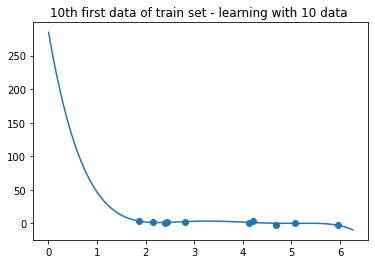

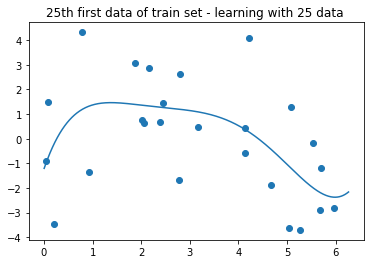

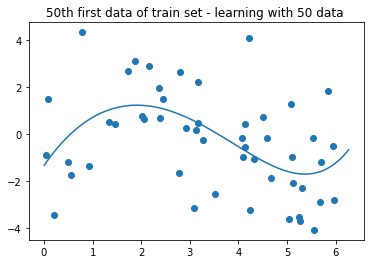

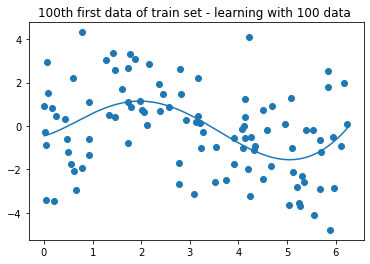

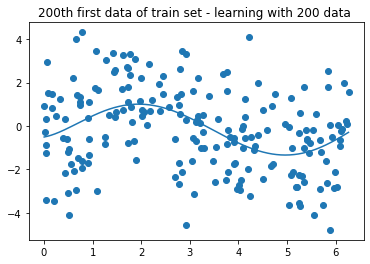

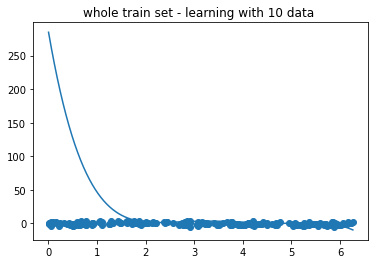

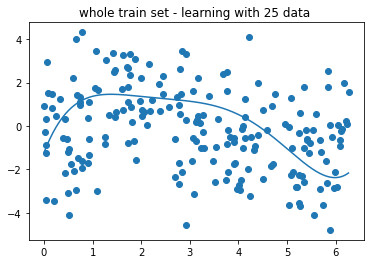

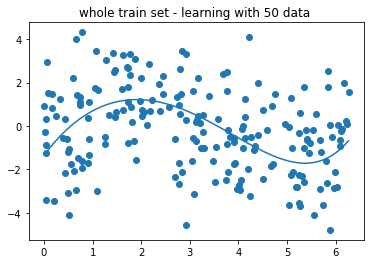

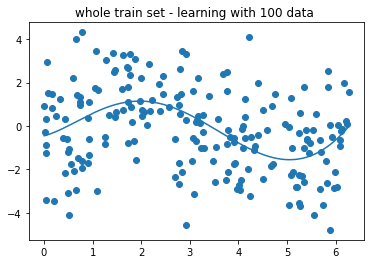

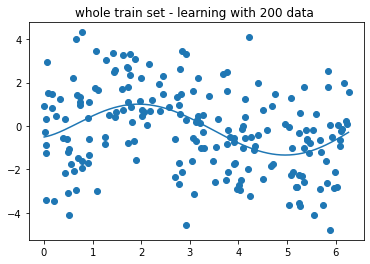

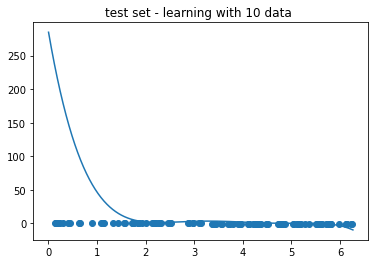

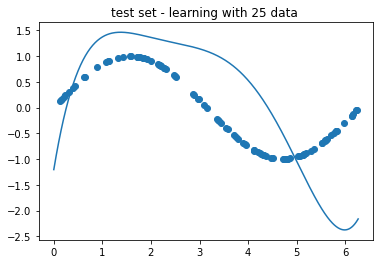

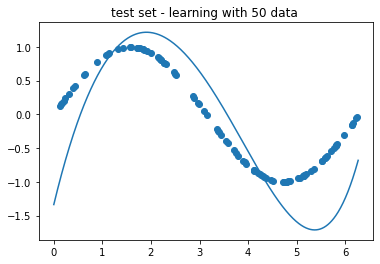

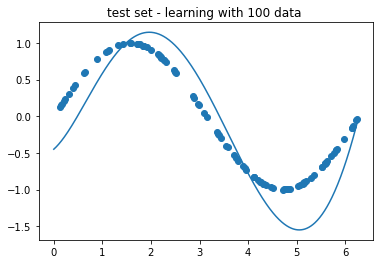

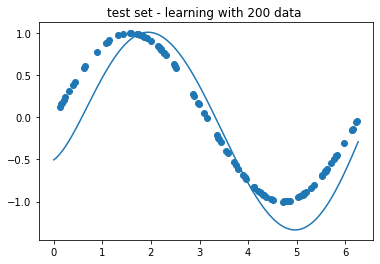

In [133]:
visualization5(Xtrain5.head(10),Ttrain.head(10),'10th first data of train set - learning with 10 data ',Xtrain,W5On10)
visualization5(Xtrain5.head(25),Ttrain.head(25),'25th first data of train set - learning with 25 data ',Xtrain,W5On25)
visualization5(Xtrain5.head(50),Ttrain.head(50),'50th first data of train set - learning with 50 data ',Xtrain,W5On50)
visualization5(Xtrain5.head(100),Ttrain.head(100),'100th first data of train set - learning with 100 data ',Xtrain,W5On100)
visualization5(Xtrain5.head(200),Ttrain.head(200),'200th first data of train set - learning with 200 data ',Xtrain,W5On200)
visualization5(Xtrain5,Ttrain,'whole train set - learning with 10 data ',Xtrain,W5On10)
visualization5(Xtrain5,Ttrain,'whole train set - learning with 25 data ',Xtrain,W5On25)
visualization5(Xtrain5,Ttrain,'whole train set - learning with 50 data ',Xtrain,W5On50)
visualization5(Xtrain5,Ttrain,'whole train set - learning with 100 data ',Xtrain,W5On100)
visualization5(Xtrain5,Ttrain,'whole train set - learning with 200 data ',Xtrain,W5On200)
visualization5(Xtest,Ttest,'test set - learning with 10 data ' , Xtrain,W5On10)
visualization5(Xtest,Ttest,'test set - learning with 25 data ' , Xtrain,W5On25)
visualization5(Xtest,Ttest,'test set - learning with 50 data ' , Xtrain,W5On50)
visualization5(Xtest,Ttest,'test set - learning with 100 data ' , Xtrain,W5On100)
visualization5(Xtest,Ttest,'test set - learning with 200 data ' , Xtrain,W5On200)


In [134]:
print('MSE:')
print('On the train set, n = 10:', MSE(Xtrain5, Ttrain, W5On10))
print('On the train set, n = 25:', MSE(Xtrain5, Ttrain, W5On25))
print('On the train set, n = 50:', MSE(Xtrain5, Ttrain, W5On50))
print('On the train set, n = 100:', MSE(Xtrain5, Ttrain, W5On100))
print('On the train set, n = 200:', MSE(Xtrain5, Ttrain, W5On200))
print()
print('On the first 10 of train set, n = 10:', MSE(Xtrain5.head(10), Ttrain.head(10), W5On10))
print('On the first 25 of train set, n = 25:', MSE(Xtrain5.head(25), Ttrain.head(25), W5On25))
print('On the first 50 of train set, n = 50:', MSE(Xtrain5.head(50), Ttrain.head(50), W5On50))
print('On the first 100 of train set, n = 100:', MSE(Xtrain5.head(100), Ttrain.head(100), W5On100))
print('On the first 200 of train set, n = 200:', MSE(Xtrain5.head(200), Ttrain.head(200), W5On200))
print()
print('On the test set, n = 10:', MSE(Xtest5, Ttest, W5On10))
print('On the test set, n = 25:', MSE(Xtest5, Ttest, W5On25))
print('On the test set, n = 50:', MSE(Xtest5, Ttest, W5On50))
print('On the test set, n = 100:', MSE(Xtest5, Ttest, W5On100))
print('On the test set, n = 200:', MSE(Xtest5, Ttest, W5On200))

MSE:
On the train set, n = 10: 5369.367569100503
On the train set, n = 25: 3.991290270445398
On the train set, n = 50: 3.2114006450797477
On the train set, n = 100: 3.107728634577155
On the train set, n = 200: 3.089566381827956

On the first 10 of train set, n = 10: 1.7582889199966611
On the first 25 of train set, n = 25: 3.5817533578849106
On the first 50 of train set, n = 50: 3.267410903681595
On the first 100 of train set, n = 100: 3.1473067322635564
On the first 200 of train set, n = 200: 3.089566381827956

On the test set, n = 10: 3421.4525850742934
On the test set, n = 25: 1.065550174677044
On the test set, n = 50: 0.3527823698286091
On the test set, n = 100: 0.15236172529779612
On the test set, n = 200: 0.09615550333444782
